In [30]:
import pandas as pd
import h5py
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

f = h5py.File('/content/gdrive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
X_test = np.array(f[list(f.keys())[0]])
X_train = np.array(f[list(f.keys())[1]])
X_val = np.array(f[list(f.keys())[2]])
y_test = np.array(f[list(f.keys())[3]])
y_train = np.array(f[list(f.keys())[4]])
y_val = np.array(f[list(f.keys())[5]])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Keys: KeysView(<HDF5 file "SVHN_single_grey1.h5" (mode r)>)


In [31]:
print("X_test Shape: ", X_test.shape)
print("X_train Shape: ", X_train.shape)
print("X_val Shape: ", X_val.shape)
print("y_test Shape: ", y_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_val Shape: ", y_val.shape)

X_test Shape:  (18000, 32, 32)
X_train Shape:  (42000, 32, 32)
X_val Shape:  (60000, 32, 32)
y_test Shape:  (18000,)
y_train Shape:  (42000,)
y_val Shape:  (60000,)


In [32]:
print("Number of Classes in y_test:{}, y_train:{}, y_val:{}".format(len(np.unique(y_test)),
                                                                    len(np.unique(y_train)), len(np.unique(y_val))))

Number of Classes in y_test:10, y_train:10, y_val:10


In [0]:
import tensorflow as tf
#Subsample the data for more efficient code execution in this exercise
num_training =  5000
mask = range(num_training)
X_train = X_train[mask]
trainY = y_train[mask]

num_val = 1000
mask = range(num_val)
X_val = X_val[mask]
valY = y_val[mask]

num_test = 1000
mask = range(num_test)
X_test = X_test[mask]
testY = y_test[mask]

In [35]:
print(trainY.shape)
print('First 2 examples now are: ', trainY[0:2])

(5000,)
First 2 examples now are:  [2 6]


In [0]:
from sklearn.neighbors import KNeighborsClassifier 
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

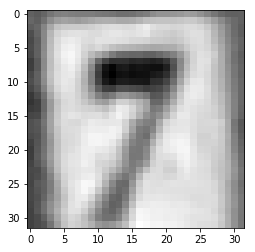

In [37]:
# Display digit 7
plt.imshow(X_train[2], cmap=plt.cm.gray_r, interpolation='nearest')

In [38]:
print("X_test Shape: ", X_test.shape)
print("X_train Shape: ", X_train.shape)
print("X_val Shape: ", X_val.shape)
print("y_test Shape: ", testY.shape)
print("y_train Shape: ", trainY.shape)
print("y_val Shape: ", valY.shape)

X_test Shape:  (1000, 32, 32)
X_train Shape:  (5000, 32, 32)
X_val Shape:  (1000, 32, 32)
y_test Shape:  (1000,)
y_train Shape:  (5000,)
y_val Shape:  (1000,)


In [0]:
# Reshape the image data into rows
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], -1))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], -1))

In [40]:
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)
print(X_val_reshaped.shape)

(5000, 1024)
(1000, 1024)
(1000, 1024)


In [0]:
# Create a k-NN classifier with 10 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 10)

In [42]:
# Fit the classifier to the training data
knn.fit(X_train_reshaped, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [43]:
# Print the accuracy
print("Accuracy with k = 10: ", knn.score(X_val_reshaped, valY)*100, '%')

Accuracy with k = 10:  54.1 %


In [0]:
#Very poor Accuracy

In [45]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 20, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_reshaped, trainY)
 
    # evaluate the model and update the accuracies list
    score = model.score(X_val_reshaped, valY)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
 
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

k=1, accuracy=42.20%
k=3, accuracy=61.50%
k=5, accuracy=56.80%
k=7, accuracy=53.70%
k=9, accuracy=55.30%
k=11, accuracy=53.70%
k=13, accuracy=52.30%
k=15, accuracy=54.10%
k=17, accuracy=54.00%
k=19, accuracy=51.00%
k=3 achieved highest accuracy of 61.50% on validation data


In [47]:
from sklearn.metrics import classification_report
# re-train our classifier using the best k value and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_reshaped, trainY)
predictions = model.predict(X_test_reshaped)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testY, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.30      0.63      0.41       117
           1       0.29      0.61      0.39        93
           2       0.28      0.38      0.33        92
           3       0.25      0.25      0.25        85
           4       0.51      0.43      0.47        96
           5       0.35      0.21      0.26       105
           6       0.33      0.22      0.27        94
           7       0.72      0.46      0.56       107
           8       0.48      0.16      0.24       100
           9       0.41      0.17      0.24       111

   micro avg       0.35      0.35      0.36      1000
   macro avg       0.39      0.35      0.34      1000
weighted avg       0.40      0.35      0.34      1000



I think that digit for i - 86 is: 0


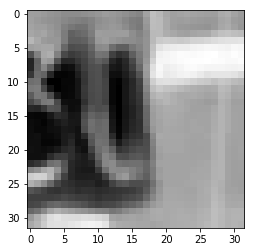

I think that digit for i - 488 is: 2


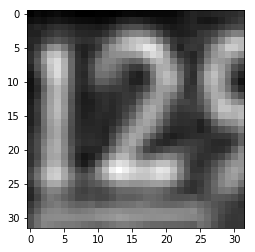

I think that digit for i - 899 is: 4


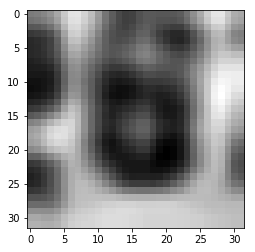

I think that digit for i - 258 is: 0


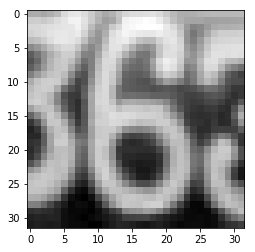

I think that digit for i - 619 is: 0


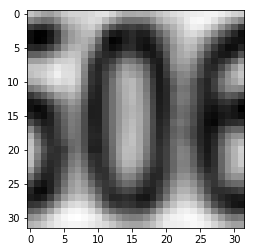

In [50]:
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
# loop over a few random digits
for i in list(map(int, np.random.randint(0, high=len(testY), size=(5,)))):
    # grab the image and classify it
    image = X_test[i]
    prediction = model.predict(image.reshape(1, -1))[0]
 
    # convert the image for a 1024-dim array to an 32 x 32 image,
    # then resize it to 32 x 32 pixels so we can see it better
    image = image.reshape((32, 32)).astype("uint8")
    image = exposure.rescale_intensity(image, out_range=(0, 255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
 
    # show the prediction
    print("I think that digit for i - {} is: {}".format(i, prediction))
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

We see that the KNN Classifier is rather poor in image classification for the above dataset. Now, let us try our hand at image classification through Deep Learning using Keras, with the same dataset.

## Image Classification Using DNN

In [0]:
# Get the data
X_test = np.array(f[list(f.keys())[0]])
X_train = np.array(f[list(f.keys())[1]])
X_val = np.array(f[list(f.keys())[2]])
y_test = np.array(f[list(f.keys())[3]])
y_train = np.array(f[list(f.keys())[4]])
y_val = np.array(f[list(f.keys())[5]])

In [67]:
print("X_test Shape: ", X_test.shape)
print("X_train Shape: ", X_train.shape)
print("X_val Shape: ", X_val.shape)
print("y_test Shape: ", y_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_val Shape: ", y_val.shape)

X_test Shape:  (18000, 32, 32)
X_train Shape:  (42000, 32, 32)
X_val Shape:  (60000, 32, 32)
y_test Shape:  (18000,)
y_train Shape:  (42000,)
y_val Shape:  (60000,)


In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)
valY = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

In [0]:
#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 1024)              4096      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               205000    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total para

In [85]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 36us/sample - loss: 0.1309 - acc: 0.9580 - val_loss: 0.8195 - val_acc: 0.8283
Epoch 2/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.1302 - acc: 0.9591 - val_loss: 0.9408 - val_acc: 0.8138
Epoch 3/10
42000/42000 [==============================] - 1s 32us/sample - loss: 0.1283 - acc: 0.9599 - val_loss: 0.6642 - val_acc: 0.8626
Epoch 4/10
42000/42000 [==============================] - 1s 32us/sample - loss: 0.1284 - acc: 0.9581 - val_loss: 0.7669 - val_acc: 0.8433
Epoch 5/10
42000/42000 [==============================] - 1s 32us/sample - loss: 0.1270 - acc: 0.9591 - val_loss: 0.7002 - val_acc: 0.8577
Epoch 6/10
42000/42000 [==============================] - 1s 32us/sample - loss: 0.1231 - acc: 0.9611 - val_loss: 0.7722 - val_acc: 0.8419
Epoch 7/10
42000/42000 [==============================] - 1s 32us/sample - loss: 0.1231 - acc: 0.9606 - val_loss: 0.

After Several Combinations of the various Epochs and Batch Size, I found that 10 epochs with a batch size of 128 yielded the best results at the extreme end with a accuracy of 86.26% on the 3rd epoch, whereas a batch size of 96 yielded consistently good results of around 84% across all epochs.

In [0]:
#Now let us try with varying learning rates with same model hyperparameters
sgd_optimizer_lr_1 = tf.keras.optimizers.SGD(lr=0.01)
sgd_optimizer_lr_5 = tf.keras.optimizers.SGD(lr=0.05)
sgd_optimizer_lr_10 = tf.keras.optimizers.SGD(lr=0.1)

In [0]:
#Compile the model
model.compile(optimizer=sgd_optimizer_lr_1, loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 44us/sample - loss: 0.0916 - acc: 0.9720 - val_loss: 0.7170 - val_acc: 0.8572
Epoch 2/10
42000/42000 [==============================] - 2s 37us/sample - loss: 0.0880 - acc: 0.9730 - val_loss: 0.7046 - val_acc: 0.8609
Epoch 3/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.0869 - acc: 0.9741 - val_loss: 0.7602 - val_acc: 0.8514
Epoch 4/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.0864 - acc: 0.9735 - val_loss: 0.7104 - val_acc: 0.8607
Epoch 5/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.0822 - acc: 0.9746 - val_loss: 0.7539 - val_acc: 0.8535
Epoch 6/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.0822 - acc: 0.9740 - val_loss: 0.7323 - val_acc: 0.8590
Epoch 7/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.0823 - acc: 0.9744 - val_loss: 0.

In [0]:
#Compile the model
model.compile(optimizer=sgd_optimizer_lr_5, loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 37us/sample - loss: 0.1789 - acc: 0.9423 - val_loss: 0.8509 - val_acc: 0.8296
Epoch 2/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.1623 - acc: 0.9465 - val_loss: 1.8110 - val_acc: 0.7395
Epoch 3/10
42000/42000 [==============================] - 1s 34us/sample - loss: 0.1684 - acc: 0.9448 - val_loss: 1.6390 - val_acc: 0.7312
Epoch 4/10
42000/42000 [==============================] - 2s 39us/sample - loss: 0.1651 - acc: 0.9462 - val_loss: 1.0528 - val_acc: 0.8075
Epoch 5/10
42000/42000 [==============================] - 2s 39us/sample - loss: 0.1574 - acc: 0.9481 - val_loss: 2.1730 - val_acc: 0.7156
Epoch 6/10
42000/42000 [==============================] - 2s 38us/sample - loss: 0.1619 - acc: 0.9477 - val_loss: 1.2582 - val_acc: 0.7767
Epoch 7/10
42000/42000 [==============================] - 2s 39us/sample - loss: 0.1488 - acc: 0.9512 - val_loss: 2.

In [0]:
#Compile the model
model.compile(optimizer=sgd_optimizer_lr_10, loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 40us/sample - loss: 0.3332 - acc: 0.8946 - val_loss: 1.7162 - val_acc: 0.6572
Epoch 2/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.2790 - acc: 0.9101 - val_loss: 2.2207 - val_acc: 0.6417
Epoch 3/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.2785 - acc: 0.9120 - val_loss: 3.2853 - val_acc: 0.5955
Epoch 4/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.2603 - acc: 0.9175 - val_loss: 1.1151 - val_acc: 0.7649
Epoch 5/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.2405 - acc: 0.9204 - val_loss: 1.9820 - val_acc: 0.6706
Epoch 6/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.2300 - acc: 0.9262 - val_loss: 1.4599 - val_acc: 0.7356
Epoch 7/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.2302 - acc: 0.9264 - val_loss: 1.

In [0]:
#It seems increasing learning rates for Stochastic Gradient Descent has a negative effect on the accuracy. However, a learning rate of 0.01 has
#proven very effective as can be seen from the above results. Let us now try once with the Adam optimizer.

In [0]:
#Compile the model
adam_optimizer = tf.keras.optimizers.Adam(lr = 0.0005)
model.compile(optimizer= adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 54us/sample - loss: 0.1425 - acc: 0.9536 - val_loss: 0.6224 - val_acc: 0.8709
Epoch 2/10
42000/42000 [==============================] - 2s 44us/sample - loss: 0.1361 - acc: 0.9569 - val_loss: 0.6358 - val_acc: 0.8718
Epoch 3/10
42000/42000 [==============================] - 2s 44us/sample - loss: 0.1350 - acc: 0.9564 - val_loss: 0.6339 - val_acc: 0.8729
Epoch 4/10
42000/42000 [==============================] - 2s 44us/sample - loss: 0.1317 - acc: 0.9569 - val_loss: 0.6486 - val_acc: 0.8741
Epoch 5/10
42000/42000 [==============================] - 2s 44us/sample - loss: 0.1336 - acc: 0.9570 - val_loss: 0.6310 - val_acc: 0.8744
Epoch 6/10
42000/42000 [==============================] - 2s 44us/sample - loss: 0.1256 - acc: 0.9589 - val_loss: 0.6471 - val_acc: 0.8749
Epoch 7/10
42000/42000 [==============================] - 2s 44us/sample - loss: 0.1261 - acc: 0.9594 - val_loss: 0.

We see excellent results after various combinations of Adam Optimizer Learning Rates and witness the highest accuracy of all models and hyperparameters with Adam Optimizer having a learning rate of 0.0005 and Batch Size 128 with 10 epochs. It is certain that results may improve through further tuning, but I feel we have reached a satisfactory model state with validation accuracy approaching the 90% range, which can be considered a good model for image classification.

From above we note that Deep Neural Networks offer a significant improvement in image classification accuracy as compared to plain vanilla KNN Classifiers. Therefore, the use of DNN with Keras for image classification is justified.

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

In [0]:
def load_image(img, show=True):
  
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [174]:
#Abandoning above POC as its not working. Below POC is better for predictions.

(32, 32)

In [190]:
#Lets Predict Images using our model
out = model.predict(X_test[0:10])
print(np.argmax(out, axis=1))

[1 7 2 9 0 9 1 8 1 4]


I think that digit is: 1


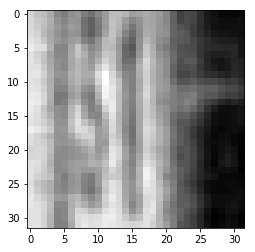

I think that digit is: 7


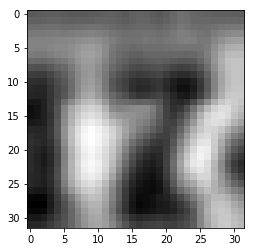

I think that digit is: 2


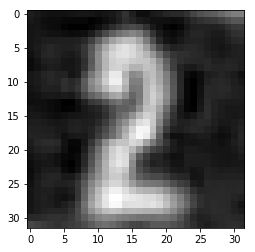

I think that digit is: 9


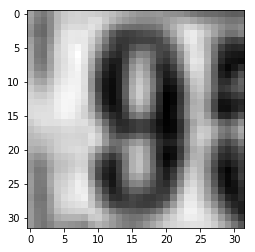

I think that digit is: 0


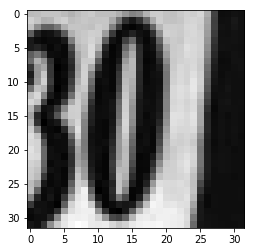

I think that digit is: 9


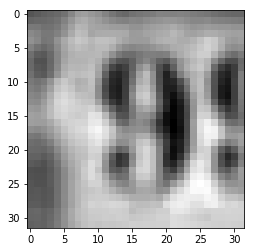

I think that digit is: 1


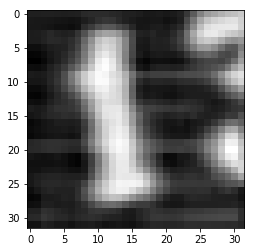

I think that digit is: 8


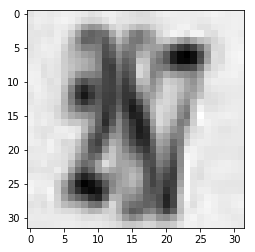

I think that digit is: 1


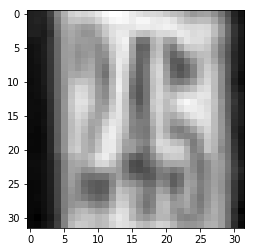

I think that digit is: 4


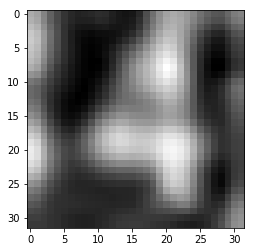

In [191]:
for i in range(0,10):
    print("I think that digit is: {}".format(np.argmax(out, axis=1)[i]))
    plt.imshow(X_test[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

We see that the model predicts images quite accurately, as per the accuracy mentioned in the model summary. Therefore, it seems we are ok with this model and approaching the human accuracy.

# Conclusion

Based on our experimentation of various classification mechanisms both classical as well through Deep Neural Networks, we may reach the conclusion that DNNs are quite efficient for image classification.

Metrics show accuracy to be sub par i.e. below 50% for classical ML KNN models whereas they show a healthy accuracy for tuned models around 87%.